# Task1 : Prediction using Supervised ML

### To Predict the percentage of a student based on the no. of study hours



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.model_selection import train_test_split 

In [5]:
print("Data Imported")
data = pd.read_csv('http://bit.ly/w-data')
data.head(10)

Data Imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
#Checking null value 
data.isnull== True

False

*If output is true then there is null value, if output is false then there is no null value in the Dataset*

In [7]:
x=data['Hours']
y=data['Scores']

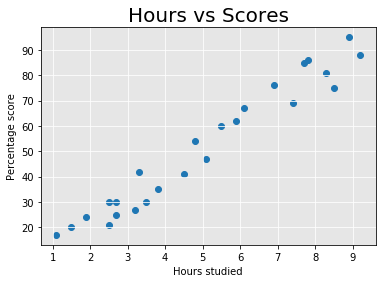

In [33]:
plt.scatter(x,y)
plt.xlabel("Hours studied")
plt.ylabel("Percentage score")
plt.title("Hours vs Scores", size=20)
plt.grid(color='w', linestyle='-')
plt.gca().patch.set_facecolor('0.9')
plt.show()

**From The graph above, There is the positive relation between number of hours and percentage of scores.**

### Preparing the data    
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [9]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [10]:
reg=LinearRegression()
reg.fit(x_train,y_train)
print("Model Trained!!")

Model Trained!!


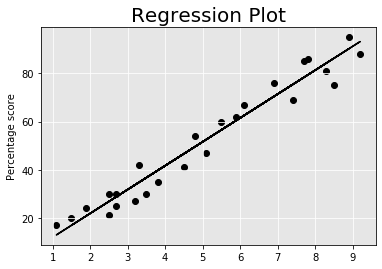

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [34]:
l = reg.coef_*x+reg.intercept_
plt.scatter(x=x, y=y, color="black")
plt.plot(x, l, color="black");
plt.title("Regression Plot",size=20)
plt.ylabel("Percentage score")
plt.grid(color='w', linestyle='-')
plt.gca().patch.set_facecolor('0.9')
plt.show()
print(data.corr())

### Making Prediction

In [18]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [17]:
pred_y = reg.predict(x_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in x_test], 'Predicted Scores': [k for k in pred_y]})
prediction

,Hours,Predicted Scores
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [14]:
compared_scores=pd.DataFrame({"Actual Scores":y_test, "Predicted Scores": pred_y})
compared_scores

,Actual Scores,Predicted Scores
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


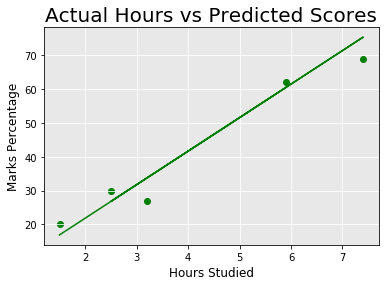

In [31]:
plt.scatter(x=x_test, y=y_test, color='green')
plt.plot(x_test, pred_y, color='green')
plt.title('Actual Hours vs Predicted Scores', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.grid(color='w', linestyle='-')
plt.gca().patch.set_facecolor('0.91')
plt.show()

### Evaluating the model

In [36]:
print('Mean absolute error: ',mean_absolute_error(y_test,pred_y))

Mean absolute error:  4.183859899002975


### What will be the predicted score of a student if he/she studies for 9.25 and 7.9 hrs/ day?

In [44]:
hours=[9.25]
r=reg.predict([hours])
print(f"Score: {round(r[0],2)}",)

Score: 93.69


In [48]:
hours=[7.9]
r=reg.predict([hours])
print(f"Score: {round(r[0],2)}",)

Score: 80.31
